<a href="https://colab.research.google.com/github/ronilsoncruz/Machine-Learning-II/blob/main/Atividade_13_Ronilson_da_Cruz_Nascimento_Machine_Learning_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

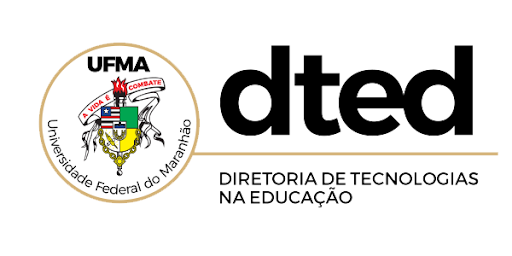

**Universidade Federal do Maranhão**  <br>
**Diretoria de Tecnologias na Educação**  <br>
**Especialização em Análise de Dados e Inteligência Artificial**  <br>
**Disciplina de Machine Learning II**  <br>
**Professor: Dr. Paulo Rogério de Almeida Ribeiro**  <br>
**Professor Tutor: Mestrando John Hobby Alves de Aguiar** <br>
**Aluno: Ronilson da Cruz Nascimento**  <br>


**Atividade 13**:  <br>
*Trabalho de conclusão da disciplina de Machine Learning II, compondo atividade 13, da implementação de um código computacional na linguagem Python de Aprendizagem Não-Supervisionada, do curso de especialização em Análise de Dados e Inteligência Artificial.*

![CLUSTERING](https://blog.bismart.com/hubfs/Imported_Blog_Media/Clustering&clasification-Animales-Sep-26-2023-09-13-22-7262-AM.gif)

![K-MEANS](https://miro.medium.com/v2/resize:fit:832/1*AzX-3FPncrZaIfWbI5EwCw.gif)

**ATIVIDADE 13 - DISCIPLINA DE MACHINE LENARNING II**

**SEGMENTAÇÃO DE CLIENTES COM APRENDIZADO NÃO SUPERVISIONADO: UMA ABORDAGEM UTILIZANDO O WHOLESALE CUSTOMERS DATASET.**


# **10.	IMPLEMENTAÇÃO COM ALGORITMO EM PYTHON**

### **PASSO 1 - Importação das Bibliotecas: Importar as bibliotecas essenciais para o projeto.**


In [ ]:
# PASSO 1 - Importação das Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Configurações para carregar a base de dados no Google Colab
from google.colab import files
uploaded = files.upload()
import io

Saving Wholesale customers data.csv to Wholesale customers data.csv


### **PASSO 2 – Carregar os dados: Carregar os dados de um arquivo CSV especificado pela URL e exibir as primeiras linhas do DataFrame.**

In [ ]:
# PASSO 2 – Carregar os dados
# Como o nome do arquivo é 'Wholesale customers data.csv'
df = pd.read_csv(io.BytesIO(uploaded['Wholesale customers data.csv']))
print("PASSO 2 - Dados Carregados:")
print(df.head())

PASSO 2 - Dados Carregados:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


### **PASSO 3 – Remover colunas categóricas: Remover as colunas categóricas "Channel" e "Region" para focar nos dados numéricos de gastos.**

In [ ]:
# PASSO 3 – Remover colunas categóricas
df.drop(["Channel", "Region"], axis=1, inplace=True)
print("PASSO 3 - Dados após remoção de colunas categóricas:")
print(df.head())

PASSO 3 - Dados após remoção de colunas categóricas:
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
2   6353  8808     7684    2405              3516        7844
3  13265  1196     4221    6404               507        1788
4  22615  5410     7198    3915              1777        5185


### **PASSO 4 – Padronizar e visualizar os dados padronizados: Padronizar os dados para que todas as variáveis tenham a mesma escala, o que é importante para algoritmos de clustering.**

In [ ]:
# PASSO 4 – Padronizar os dados para que todas as variáveis tenham a mesma escala
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
print("PASSO 4 - Dados Padronizados:")
print(df_scaled.head())

PASSO 4 - Dados Padronizados:
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.052933  0.523568 -0.041115 -0.589367         -0.043569   -0.066339
1 -0.391302  0.544458  0.170318 -0.270136          0.086407    0.089151
2 -0.447029  0.408538 -0.028157 -0.137536          0.133232    2.243293
3  0.100111 -0.624020 -0.392977  0.687144         -0.498588    0.093411
4  0.840239 -0.052396 -0.079356  0.173859         -0.231918    1.299347


### **Visualização dos dados padronizados em um gráfico BoxPlot:**

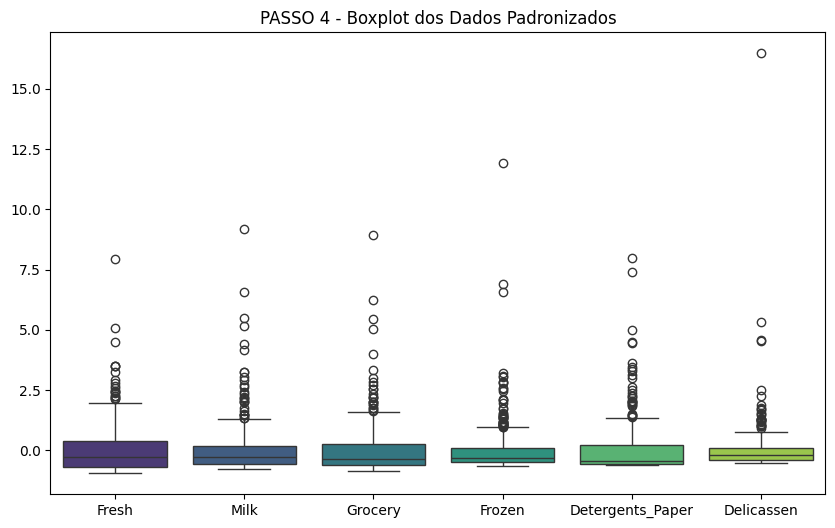

In [ ]:
# Visualização da padronização dos dados / Gráfico BoxPlot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_scaled, palette="viridis")
plt.title("PASSO 4 - Boxplot dos Dados Padronizados")
plt.savefig("boxplot_dados_padronizados.jpeg", format='jpeg')  # Salvar o gráfico como JPEG no diretório atual do Colab
plt.show()


### ***PASSO 5 – Redução de Dimensionalidade com PCA: Aplicar a redução de dimensionalidade nos dados para dois componentes principais, o que facilita a visualização e pode melhorar o desempenho do clustering.***

In [ ]:
# PASSO 5 – Redução de Dimensionalidade com PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=["Componente Principal 1", "Componente Principal 2"])
print("PASSO 5 - Dados após Redução de Dimensionalidade com PCA:")
print(df_pca.head())

PASSO 5 - Dados após Redução de Dimensionalidade com PCA:
   Componente Principal 1  Componente Principal 2
0                0.193291               -0.305100
1                0.434420               -0.328413
2                0.811143                0.815096
3               -0.778648                0.652754
4                0.166287                1.271434


### **Visualização dos componentes principais (PCA):**

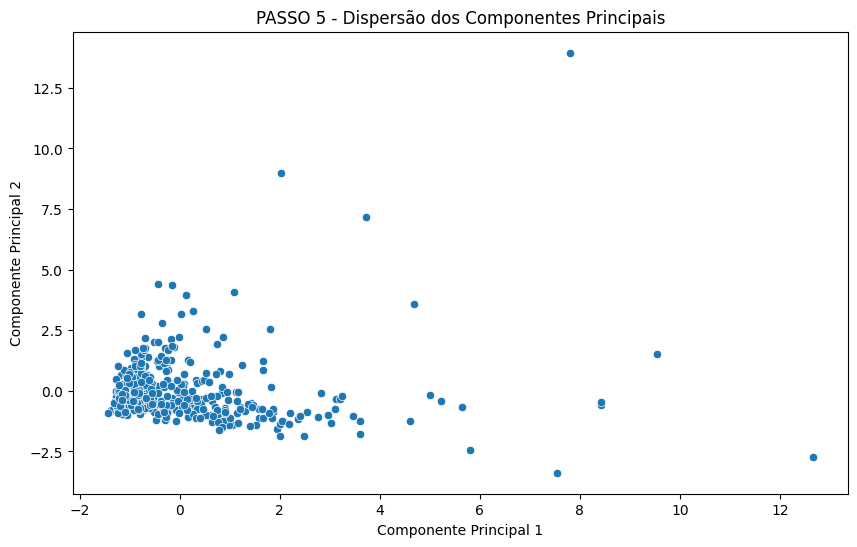

In [ ]:
# Visualização dos componentes principais
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca["Componente Principal 1"], y=df_pca["Componente Principal 2"])
plt.title("PASSO 5 - Dispersão dos Componentes Principais")
plt.savefig("dispersao_componentes_principais.jpeg", format='jpeg')  # Salvar o gráfico como JPEG no diretório atual do Colab
plt.show()

### ***PASSO 6 – Aplicação do método K-Means para agrupar os clientes: Aplicar o algoritmo K-Means para agrupar os clientes em 3 clusters distintos.**

In [ ]:
# PASSO 6 – Aplicação do método K-Means para agrupar os clientes
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_pca)
df_pca["Cluster"] = clusters
print("PASSO 6 - Clusters Identificados pelo K-Means:")
print(df_pca.head())


PASSO 6 - Clusters Identificados pelo K-Means:
   Componente Principal 1  Componente Principal 2  Cluster
0                0.193291               -0.305100        0
1                0.434420               -0.328413        0
2                0.811143                0.815096        1
3               -0.778648                0.652754        1
4                0.166287                1.271434        1


### **PASSO 7 – Adicionar os Clusters ao DataFrame Original: Adicionar os clusters resultantes ao DataFrame original para que cada cliente tenha um rótulo de cluster associado.**

In [ ]:
# PASSO 7 – Adicionar os Clusters ao DataFrame Original
df["Cluster"] = clusters
print("PASSO 7 - DataFrame Original com Clusters:")
print(df.head())

PASSO 7 - DataFrame Original com Clusters:
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  Cluster
0  12669  9656     7561     214              2674        1338        0
1   7057  9810     9568    1762              3293        1776        0
2   6353  8808     7684    2405              3516        7844        1
3  13265  1196     4221    6404               507        1788        1
4  22615  5410     7198    3915              1777        5185        1


### **PASSO 8 – Visualização dos Clusters: Criar um gráfico de dispersão (scatter plot) usando as duas componentes principais do PCA e colore os pontos com base nos clusters atribuídos.**

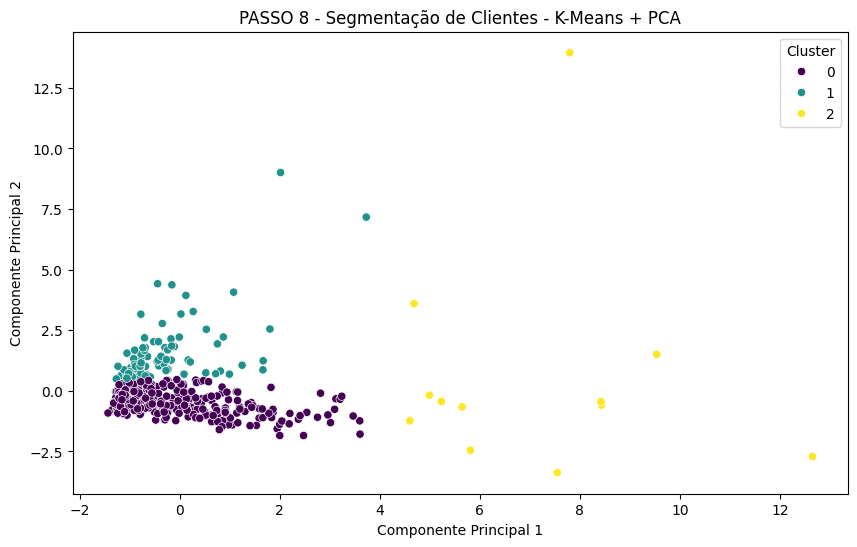

In [ ]:
# PASSO 8 – Visualização dos Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca["Componente Principal 1"], y=df_pca["Componente Principal 2"], hue=df_pca["Cluster"], palette="viridis")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PASSO 8 - Segmentação de Clientes - K-Means + PCA")
plt.savefig("segmentacao_clientes_kmeans_pca.jpeg", format='jpeg')  # Salvar o gráfico como JPEG no diretório atual do Colab
plt.show()

### **PASSO 9 – Exibir as informações sobre os Clusters: Exibe a média dos valores de cada variável para cada cluster, fornecendo insights sobre as características dos diferentes grupos de clientes.**

**Para melhorar o código e proporcionar uma interpretação mais clara e intuitiva dos dados sobre os clusters, aplica-se as seguintes melhorias:**

**Exibir Estatísticas Adicionais**: Além das médias, exibe-se outras estatísticas descritivas como mediana, desvio padrão, mínimo e máximo.

**Visualização Gráfica**: Utiliza-se gráficos para uma representação visual dos dados.

**Formatação**: Melhorar a formatação da saída para facilitar a leitura.


PASSO 9 - Informações sobre os Clusters:
                Fresh                                             Milk  \
                 mean   median           std min     max          mean   
Cluster                                                                  
0         7814.554896   6137.0   6533.550536   3   29526   4957.032641   
1        26634.692308  24025.0  17523.912919   3  112151   4971.197802   
2        18572.416667  14118.0  14546.620404  85   44466  35621.500000   

                                             ... Detergents_Paper           \
          median           std   min    max  ...             mean   median   
Cluster                                      ...                             
0         3610.0   4501.688953    55  25862  ...      2799.839763    960.0   
1         3473.0   5472.832868   134  29627  ...       780.032967    439.0   
2        33157.5  17667.898036  4980  73498  ...     21110.666667  19740.0   

                                    Delicasse

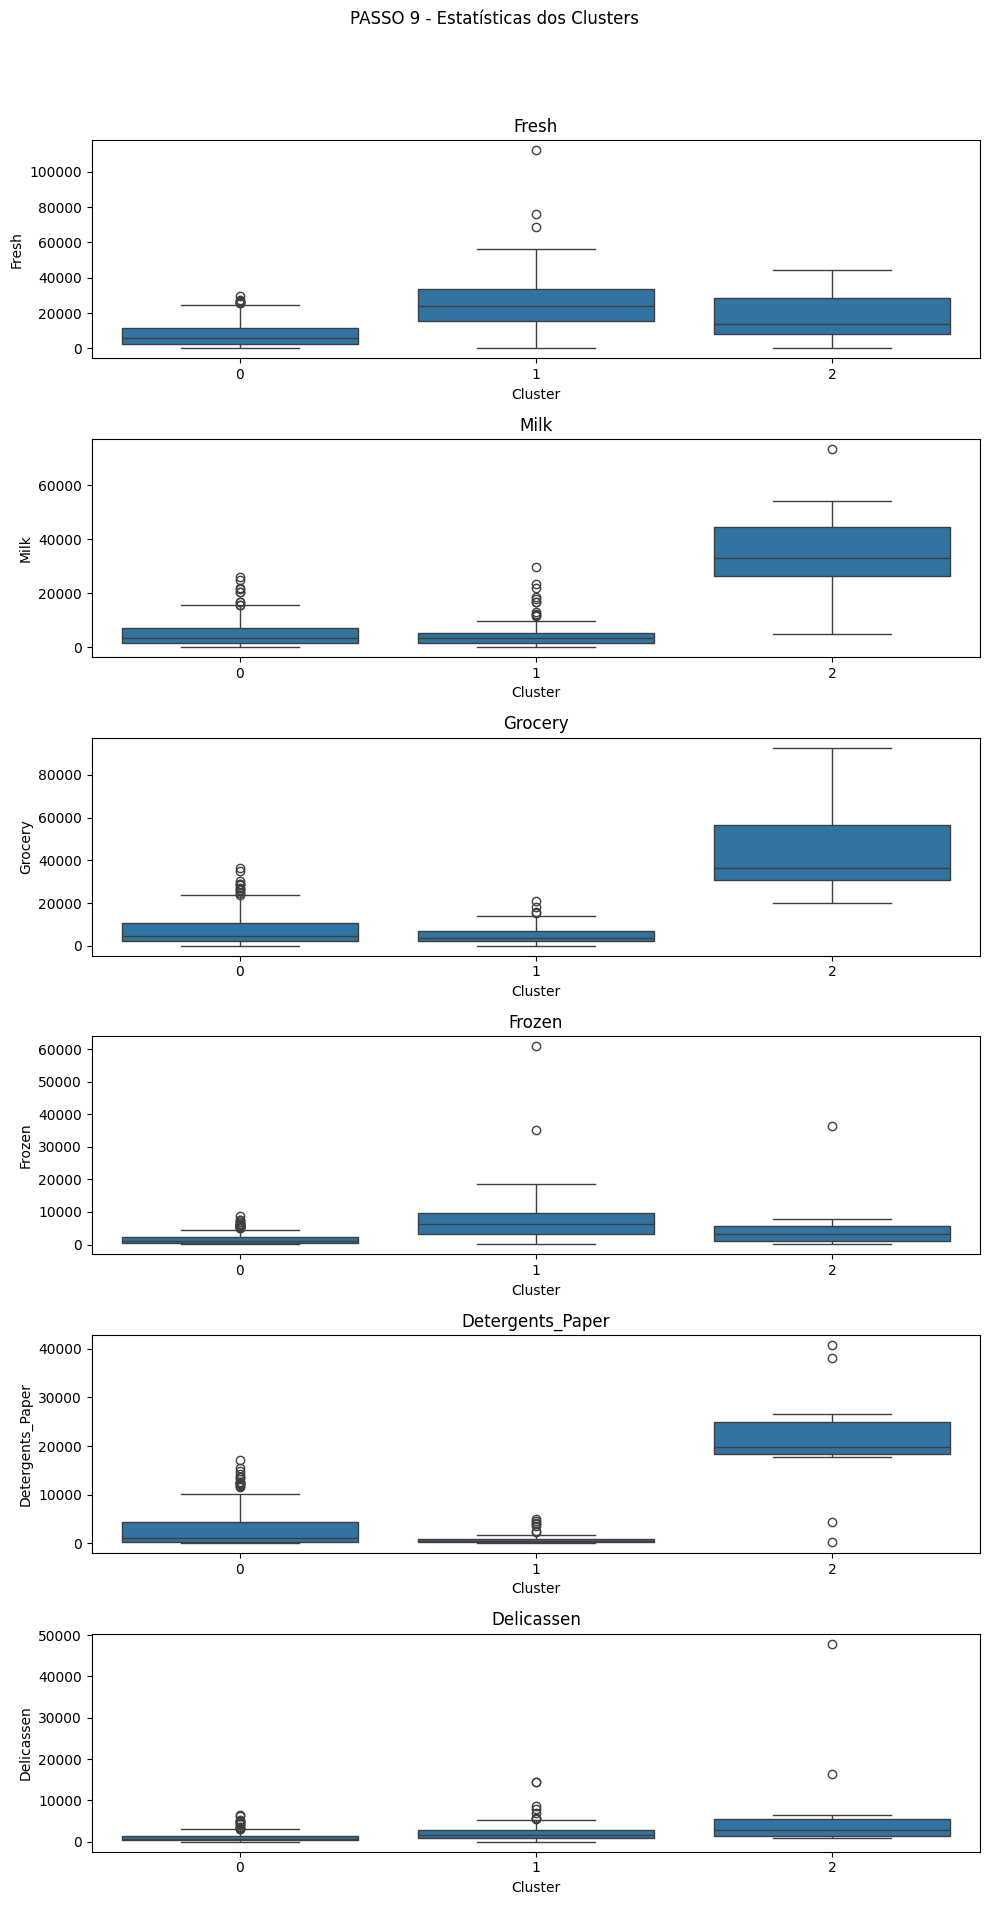

In [ ]:
# PASSO 9 – Exibir as informações sobre os Clusters
print("PASSO 9 - Informações sobre os Clusters:")
cluster_info = df.groupby("Cluster").agg(["mean", "median", "std", "min", "max"])
print(cluster_info)

# Visualização das Estatísticas dos Clusters
fig, axes = plt.subplots(len(df.columns)-1, 1, figsize=(10, 20))
fig.suptitle('PASSO 9 - Estatísticas dos Clusters')

for i, col in enumerate(df.columns[:-1]):
    sns.boxplot(x="Cluster", y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("estatisticas_clusters.jpeg", format='jpeg')  # Salvar o gráfico como JPEG no diretório atual do Colab
plt.show()

### O código desenvolvido realiza a segmentação de clientes utilizando dados de gastos. Ele padroniza os dados, reduz a dimensionalidade para visualização, aplica o algoritmo de clustering K-Means para agrupar os clientes e, finalmente, visualiza e exibe informações sobre os clusters resultantes.

### **Para todas as imagens geradas no projeto**
### **Pode-se utilizar o código abaixo para realizar o download:**

from google.colab import files

Fazer o download da imagem salva

files.download('boxplot_dados_padronizados.jpeg')

In [ ]:
# Importar a biblioteca
from google.colab import files
# Fazer o download da imagem salva
files.download('boxplot_dados_padronizados.jpeg')
files.download('dispersao_componentes_principais.jpeg')
files.download('estatisticas_clusters.jpeg')
files.download('segmentacao_clientes_kmeans_pca.jpeg')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Código Atualizado com implementação do Método do Cotovelo e Silhueta:**
### **PASSO 10, 11 e 12:**



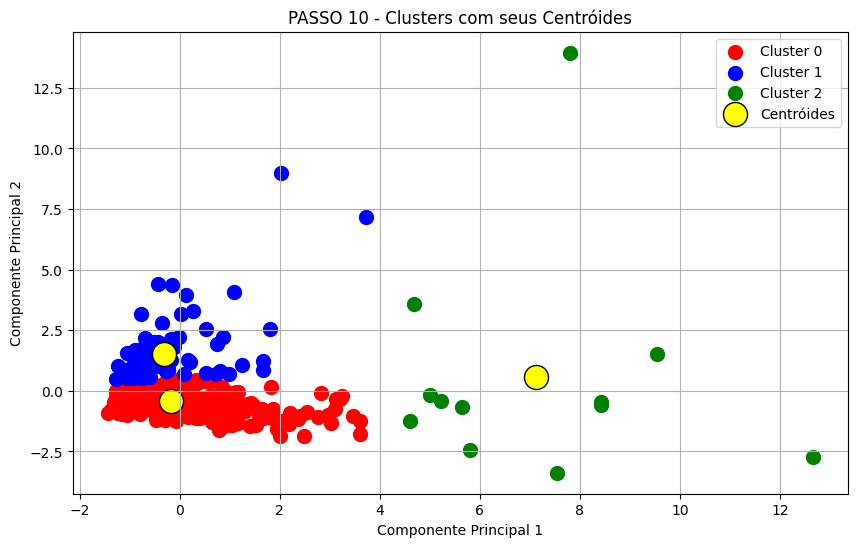

In [ ]:
# PASSO 10 – Visualização dos Clusters com seus Centróides
plt.figure(figsize=(10, 6))

# Paleta de cores para os clusters
colors = ['red', 'blue', 'green']

# Plotar os pontos de dados, coloridos de acordo com seus clusters
for cluster in range(kmeans.n_clusters):
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['Componente Principal 1'], cluster_data['Componente Principal 2'],
                s=100, c=colors[cluster], label=f'Cluster {cluster}')

# Plotar os centróides
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centróides', edgecolors='black')

# Configurações do gráfico
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PASSO 10 - Clusters com seus Centróides')
plt.legend()
plt.grid(True)

# Salvar o gráfico como JPEG
plt.savefig("clusters_com_centroide.jpeg", format='jpeg')

# Exibir o gráfico
plt.show()


PASSO 11 - Distância Euclidiana entre cada ponto e seu centróide:
         count      mean       std       min       25%       50%       75%  \
Cluster                                                                      
0        337.0  1.234492  0.990919  0.184806  0.655612  1.028359  1.343002   
1         91.0  2.116150  0.511787  1.298020  1.765971  2.207329  2.409860   
2         12.0  6.900116  2.531137  4.741303  4.986727  6.187083  7.953149   

               max  
Cluster             
0         5.524469  
1         4.598425  
2        13.284400  


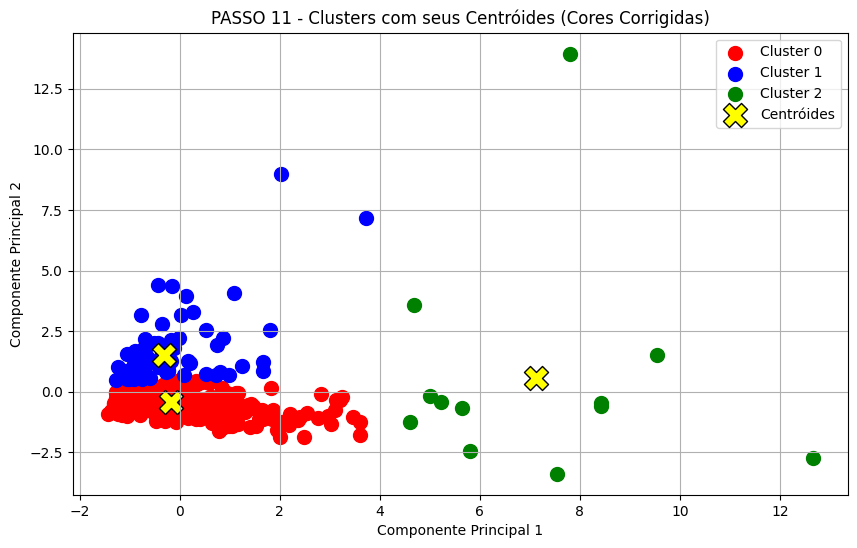

<ipython-input-15-849ed0f07cf5>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_pca["Cluster"], y=df_pca["Distância ao Centróide"],


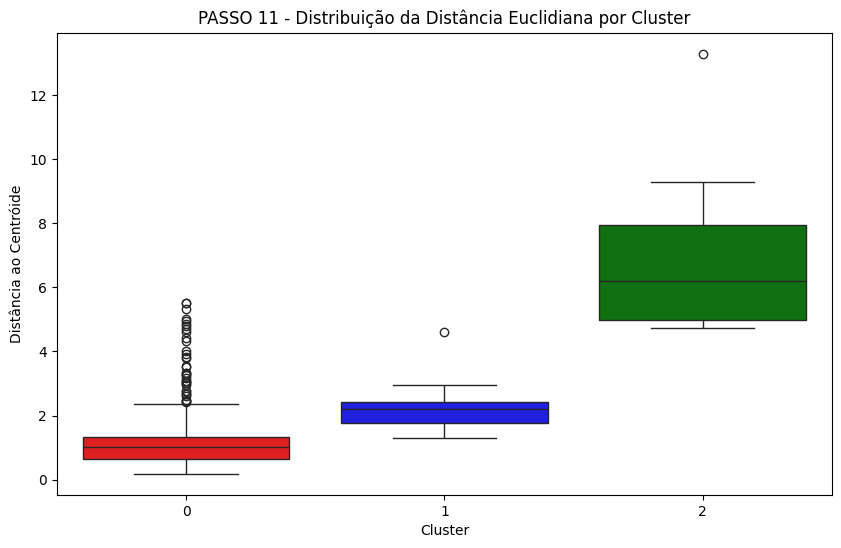

In [ ]:
from scipy.spatial.distance import euclidean

# PASSO 11 – Cálculo da Distância Euclidiana entre os elementos e seus centróides
df_pca["Distância ao Centróide"] = [
    euclidean(df_pca.iloc[i, :-2], kmeans.cluster_centers_[df_pca["Cluster"].iloc[i]])
    for i in range(len(df_pca))
]

print("PASSO 11 - Distância Euclidiana entre cada ponto e seu centróide:")
print(df_pca.groupby("Cluster")["Distância ao Centróide"].describe())

# Definição das cores específicas para os clusters
cores_clusters = {0: 'red', 1: 'blue', 2: 'green'}

# Criando o gráfico de dispersão com os clusters e seus centróides
plt.figure(figsize=(10, 6))

# Plotar cada cluster com sua cor correspondente
for cluster in cores_clusters.keys():  # Garante que as chaves sejam inteiros
    cluster_data = df_pca[df_pca["Cluster"] == cluster]
    plt.scatter(cluster_data["Componente Principal 1"], cluster_data["Componente Principal 2"],
                s=100, c=cores_clusters[cluster], label=f'Cluster {cluster}')

# Plotar os centróides em amarelo
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', marker='X', label='Centróides', edgecolors='black')

# Configurações do gráfico
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PASSO 11 - Clusters com seus Centróides (Cores Corrigidas)")
plt.legend()
plt.grid(True)

# Salvar o gráfico como JPEG
plt.savefig("distancia_euclidiana_clusters.jpeg", format='jpeg')

# Exibir o gráfico
plt.show()

# Visualização da distribuição das distâncias por cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_pca["Cluster"], y=df_pca["Distância ao Centróide"],
            palette=[cores_clusters[i] for i in sorted(cores_clusters.keys())])  # Converte as cores corretamente

plt.xlabel("Cluster")
plt.ylabel("Distância ao Centróide")
plt.title("PASSO 11 - Distribuição da Distância Euclidiana por Cluster")

# Salvar o gráfico como JPEG
plt.savefig("boxplot_distancia_clusters.jpeg", format='jpeg')

# Exibir o gráfico
plt.show()


In [ ]:
# PASSO 12 - Avaliação do Modelo: Cross-Tabulation para validar os Clusters
print("PASSO 12 - Avaliação do Modelo: Cross-Tabulation entre Cluster e Classificação Original\n")

# Supondo que temos uma variável de classe original chamada "Classe" (caso exista no dataset original)
if "Classe" in df.columns:
    cross_tab = pd.crosstab(df["Classe"], df["Cluster"])
    print(cross_tab)

    # Visualização da Matriz de Contingência
    plt.figure(figsize=(8, 6))
    sns.heatmap(cross_tab, annot=True, cmap="Blues", fmt="d", linewidths=0.5)
    plt.title("PASSO 12 - Matriz de Contingência entre Classe Original e Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Classe Original")

    # Salvar a matriz de contingência como JPEG
    plt.savefig("matriz_contingencia.jpeg", format='jpeg')

    # Exibir o gráfico
    plt.show()
else:
    print("A base de dados não contém uma coluna de classe original para comparação.\n")


PASSO 12 - Avaliação do Modelo: Cross-Tabulation entre Cluster e Classificação Original

A base de dados não contém uma coluna de classe original para comparação.



### **Avaliar a Separação dos Clusters com a Métrica de Silhueta**

A pontuação de silhueta mede o quão bem os pontos estão agrupados em seus respectivos clusters. Ela varia de -1 a 1:

Valores próximos de 1 → Clusters bem separados.

Valores próximos de 0 → Padrão de clusterização indefinido.

Valores negativos → Os pontos podem estar agrupados no cluster errado.

✅ Se a pontuação da silhueta for alta (~0.7 a 1.0) → Clusterização bem definida.

❌ Se for baixa (~0.0 a 0.3) → Talvez o número de clusters precise ser ajustado.



In [ ]:
from sklearn.metrics import silhouette_score

# PASSO 12 - Avaliação do Modelo com a Métrica de Silhueta
silhouette_avg = silhouette_score(df_pca[["Componente Principal 1", "Componente Principal 2"]], df_pca["Cluster"])
print(f"PASSO 12 - Pontuação Média da Silhueta: {silhouette_avg:.4f}")


PASSO 12 - Pontuação Média da Silhueta: 0.3817


**Analisar a Compactação e Separação dos Clusters:**

Visualizar a distribuição das distâncias entre pontos e seus centróides para verificar se os clusters são bem compactados ou se há sobreposição entre clusters.

✅ Se as distâncias forem pequenas e similares dentro dos clusters → O modelo segmentou bem os clientes.

❌ Se houver grande variação nas distâncias → Pode haver pontos mal alocados.

In [ ]:
# Estatísticas das distâncias ao centróide por cluster
print("PASSO 12 - Estatísticas das Distâncias aos Centróides:")
print(df_pca.groupby("Cluster")["Distância ao Centróide"].describe())


PASSO 12 - Estatísticas das Distâncias aos Centróides:
         count      mean       std       min       25%       50%       75%  \
Cluster                                                                      
0        337.0  1.234492  0.990919  0.184806  0.655612  1.028359  1.343002   
1         91.0  2.116150  0.511787  1.298020  1.765971  2.207329  2.409860   
2         12.0  6.900116  2.531137  4.741303  4.986727  6.187083  7.953149   

               max  
Cluster             
0         5.524469  
1         4.598425  
2        13.284400  


**Experimentar Diferentes Números de Clusters (k):**
A escolha do número de clusters (k) pode impactar diretamente na qualidade do modelo.

Pode-se utilizar o **método do cotovelo** para encontrar um valor adequado de k.

✅ O ponto onde o gráfico forma um "cotovelo" indica o número ideal de clusters.


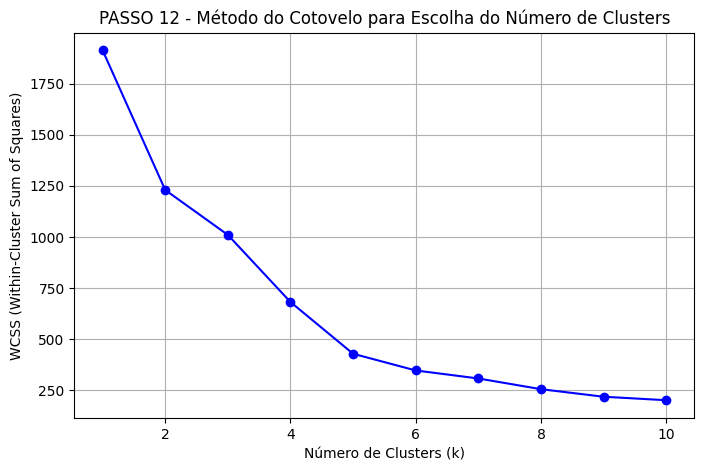

In [ ]:
# PASSO 12 - Método do Cotovelo para Encontrar o Melhor Número de Clusters
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca[["Componente Principal 1", "Componente Principal 2"]])
    wcss.append(kmeans.inertia_)  # Soma dos erros quadráticos dentro dos clusters

# Plotando o gráfico do Método do Cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("PASSO 12 - Método do Cotovelo para Escolha do Número de Clusters")
plt.grid(True)

# Salvar gráfico
plt.savefig("metodo_cotovelo.jpeg", format='jpeg')

plt.show()
